In [4]:
from IPython.display import Image, display

# Gestão de Cartão de Crédito Na Índia

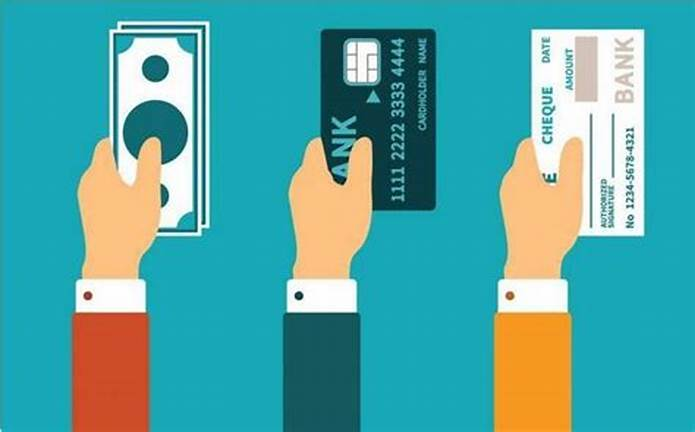

In [5]:
display(Image(filename='OIP.jpeg',  height=800))

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('Credit card transactions - India - Simple.csv')

In [8]:
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [9]:
df.columns

Index(['index', 'City', 'Date', 'Card Type', 'Exp Type', 'Gender', 'Amount'], dtype='object')

In [10]:
df.columns = ['índice', 'cidade', 'data', 'tipo de cartão', 'tipo exp', 'sexo', 'valor']

In [11]:
df.head()

,índice,cidade,data,tipo de cartão,tipo exp,sexo,valor
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   índice          26052 non-null  int64 
 1   cidade          26052 non-null  object
 2   data            26052 non-null  object
 3   tipo de cartão  26052 non-null  object
 4   tipo exp        26052 non-null  object
 5   sexo            26052 non-null  object
 6   valor           26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [13]:
df.isna().sum()

índice            0
cidade            0
data              0
tipo de cartão    0
tipo exp          0
sexo              0
valor             0
dtype: int64

In [14]:
import seaborn as sns
import plotly.express as px

# Na nossa base de dados registou-se que há mais gastos em comida em relação aos outros itens

<Axes: xlabel='tipo exp', ylabel='Count'>

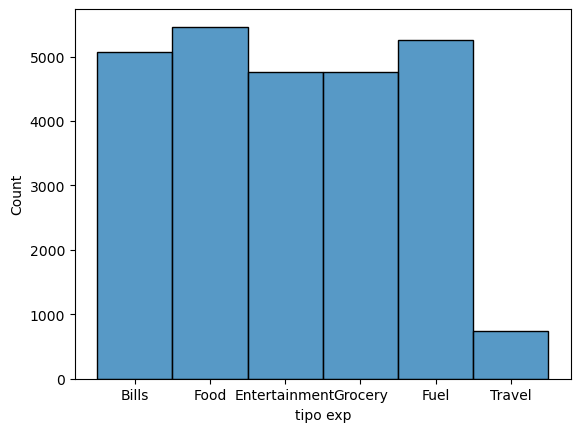

In [23]:
sns.histplot(data=df, x='tipo exp')

# Os gastos com base o sexo esta meio equilibrado com excessão nas contas, as mulheres são as que mais pagam as contas me levando a pensar que há muitas mulheres independente, solteiras ou talvez a cultura indiana tem influenciado nesses valores de forma talvez que seja cultural as mulheres arranjarem casa própria depois de atingir a fase adulta

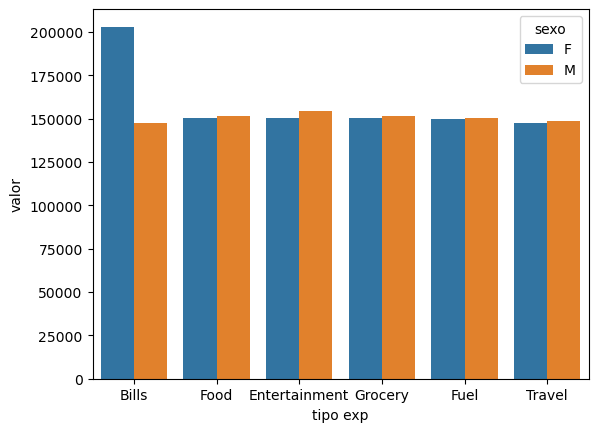

In [16]:
sns.barplot(data=df, x='tipo exp', y='valor', hue='sexo', errorbar=('ci', False));

# Mas o que realmente faz diferença nos bolsos dos indianos é o gasto em pagamentos de contas atingindo mas de 907 milhões em dinheiro, diferente dos gastos em comida que atingiu mais de 824 milhões como se pode observar na tabela a baixo. Que me leva a concluir que os valores das contas a se pagar são muito altas ou há muitas contas que o cidadão deverá pagar

In [17]:
df[['tipo exp','valor']].groupby('tipo exp').sum().sort_values(by='valor', ascending=False).style.background_gradient(cmap='Blues')

,valor
tipo exp,
Bills,907072473
Food,824724009
Fuel,789135821
Entertainment,726437536
Grocery,718207923
Travel,109255611


# Temos uma lista com o total de receita gasto por cidade onde podemos considerar que as 5 primeiras cidades são as que trazem mais receitas e as 5 ultimas cidades não trazem muitas receitas

In [18]:
df[['cidade', 'valor']].groupby('cidade').sum().sort_values(by='valor', ascending=False)

,valor
cidade,
"Greater Mumbai, India",576751476
"Bengaluru, India",572326739
"Ahmedabad, India",567794310
"Delhi, India",556929212
"Kolkata, India",115466943
...,...
"Changanassery, India",30074
"Tirur, India",26094
"Bahraich, India",24253


# Para as empresas que atuam na área de entretenimento as cidades de Bengaluru, Dalli-Rajhara, Ahmedabad, Bikaner e Greater Mumbai seriam um bom mercado para aproveitar visto que gastam mais de 299 mil em entretenimento

In [19]:
pagos_por_entretenimento_nas_cidades = df[['cidade', 'tipo exp', 'valor']]
pagos_por_entretenimento_nas_cidades[pagos_por_entretenimento_nas_cidades['tipo exp'] == 'Entertainment'].sort_values(by='valor', ascending=False)

,cidade,tipo exp,valor
13280,"Bengaluru, India",Entertainment,299936
17846,"Dalli-Rajhara, India",Entertainment,299906
9208,"Ahmedabad, India",Entertainment,299794
18950,"Bikaner, India",Entertainment,299673
11573,"Greater Mumbai, India",Entertainment,299610
...,...,...,...
12217,"Greater Mumbai, India",Entertainment,1240
13802,"Ahmedabad, India",Entertainment,1177
22900,"Lucknow, India",Entertainment,1133
5256,"Bengaluru, India",Entertainment,1074


# E o cartão preferencial para os pagamentos pelos visto é o Silver

<Axes: xlabel='tipo de cartão', ylabel='Count'>

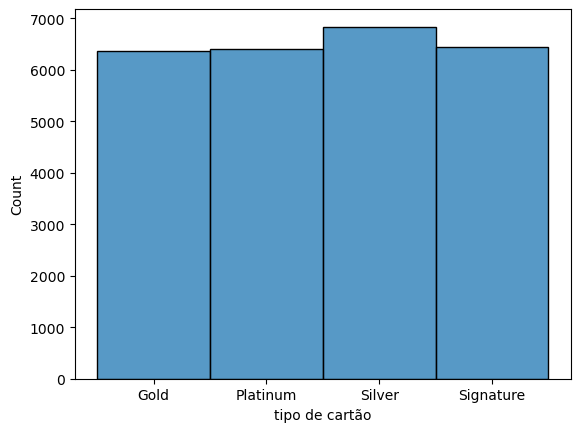

In [20]:
sns.histplot(df['tipo de cartão'])